# Challenge 1: Multinomial NB

Repeat the text classification exercise from the class lecture, choosing 

1. Four categories which you think are sufficiently distinct from each other and therefore easy to discriminate. Is the confusion matrix mostly diagonal as expected? Use the *predict category* utility function defined in class to classify a text string --- do a few examples. Can you then think of a sentence which would trick the classifier?

2. Four categories which you think are either close to each other or sufficiently fuzzy so that they would be difficult to discriminate. Does the confusion matrix look like what you expected?

In [161]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [162]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [163]:
categories = ['rec.autos', 'talk.politics.guns',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [164]:
print(train.target[0:6])

[2 3 2 1 3 1]


In [165]:
print(train.data[3])


From: ward@cs.uiuc.edu (Christ Ward)
Subject: Re: Dumbest automotive concepts of all time
Organization: University of Illinois, Dept. of Comp. Sci., Urbana, IL
Lines: 49

R1004@vmcms.csuohio.edu writes:

>In article <C5Lz30.Jus@news.cso.uiuc.edu>
>cka52397@uxa.cso.uiuc.edu (OrioleFan@uiuc) writes:
> 
>>laszlo@csd4.csd.uwm.edu (Tyson F Nuss) writes:
>>
>>>From article <1pq6i2$a1f@news.ysu.edu>, by ak296@yfn.ysu.edu (John R. Daker):
>>>>
>>
>>>> Fake convertible roofs and vinyl roofs.
>>>> Any gold trim.
>>
>>>	These, I will agree, are abominations, right along with the fake
>>>continental spare-tire kit -- it's sad watching those little old ladies
>>>try to load their groceries into the trunk with that huge tire-medallion
>>>in the way.
>>>	Most pitiful fake convertible top: on a "Cadillac" Cimarron, with
>>>all the chrome door trim still visible -- not fooling *anyone*.
>>>Of course, there was that Hyundai Excel I once saw...
>>
>>	I have seen a cutlass Supreme coupe (GM10) with a viny

In [166]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [167]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

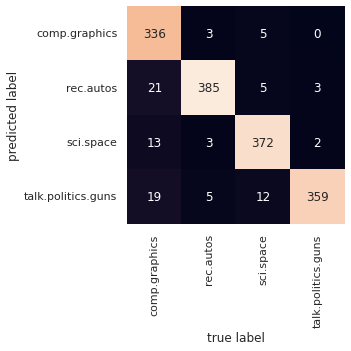

In [168]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

Yup the cnfusion matrix is diagonal as expected cuz the categories can be easly indentified on the oppsoite to th one used in class

In [169]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [170]:
predict_category('NASA is trying to get to the moon')

'sci.space'

In [171]:
predict_category('most labtops nowdays have full hd displays')

'comp.graphics'

In [172]:
predict_category('mgot a ticket for speeding')

'rec.autos'

In [173]:
predict_category('there is a poltical national probelm with weabons at the US')

'talk.politics.guns'

Let's now confuess it

In [174]:
predict_category('I just went to the garage of NASA space statition and parked my car, then I met a frined and we talked about the guns law in the US')

'talk.politics.guns'

In [175]:
categories1 = ['alt.atheism', 'soc.religion.christian',
              'talk.religion.misc', 'talk.politics.misc']
train1 = fetch_20newsgroups(subset='train', categories=categories1)
test1 = fetch_20newsgroups(subset='test', categories=categories1)

In [176]:
model.fit(train1.data, train1.target)
labels = model.predict(test1.data)

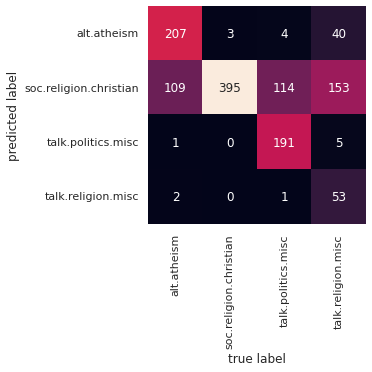

In [177]:
ma1t = confusion_matrix(test1.target, labels)
sns.heatmap(ma1t.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train1.target_names, yticklabels=train1.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

YES it look like what expected, it's not diagonal as we have a lot of confusion here for example the 153 which is confused between soc.religion.christian and talk.religion.misc

# Challenge 2: Gaussian NB on Irises

Consider the standard Iris dataset and attempt to classify the species with GaussianNB. Apply a 50-50 train-test split, train the model, compute the accuracy of the predictions and construct the confusion matrix.

In [178]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.shape

(150, 5)

In [179]:
X = iris.iloc[:,:4].values
y = iris['species'].values
print(X.shape)


(150, 4)


In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)
print(X_train.shape)

(75, 4)


In [181]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [182]:
y_pred = classifier.predict(X_test) 


array([[23,  0,  0],
       [ 0, 25,  2],
       [ 0,  1, 24]])

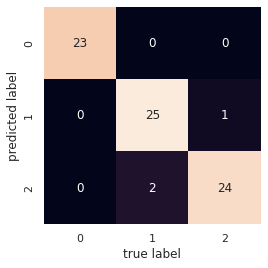

In [183]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ma1t = confusion_matrix(y_test, y_pred)
sns.heatmap(ma1t.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');
cm


In [184]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred))


Accuracy :  0.96


# Challenge 3: Gaussian NB on Digits

Consider the handwritten digits dataset from scikit-learn and attempt to classify the digits with GaussianNB. Apply the default train-test split, train a model, compute the accuracy score and construct the confusion matrix. Print a few examples where the model's prediction was wrong.

In [185]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [186]:
X1 = digits.data
X1.shape

(1797, 64)

In [187]:
y1=digits.target
y1.shape

(1797,)

In [188]:
from sklearn.manifold import Isomap
iso = Isomap(n_components =2)
iso.fit(X1)
data_projected = iso.transform(X1)
data_projected.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

In [189]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1 = train_test_split(X1,y1,random_state=0)

In [190]:
from sklearn.naive_bayes import GaussianNB
GNB= GaussianNB()
GNB.fit(X_train1,y_train1)
y_GNB = GNB.predict(X_test1)

In [191]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test1,y_GNB)

0.8333333333333334

Text(89.18, 0.5, 'True Value')

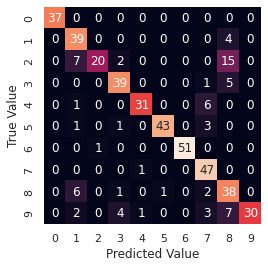

In [192]:
matrix=confusion_matrix(y_test1,y_GNB)
sns.heatmap(matrix, square = True, annot = True, cbar=False)
plt.xlabel('Predicted Value')
plt.ylabel('True Value')

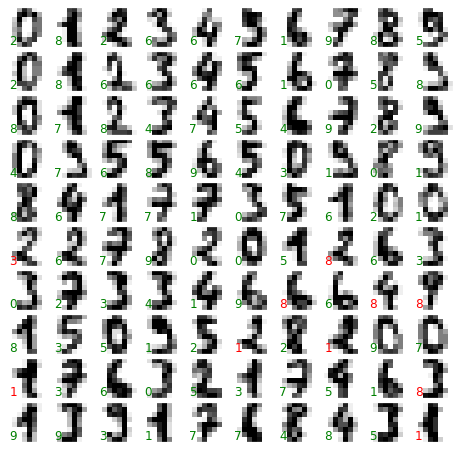

In [193]:
fig,axes = plt.subplots(10,10, figsize=(8,8),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation = 'nearest'),
    ax.text(0.05,0.05,str(y_GNB[i]),
           transform=ax.transAxes, 
            color = 'green' if (y_test1[i]==y_GNB[i]) 
                               else 'red')
    #the red ones are for the incorrect examples

    #the red ones are for the incorrect examples and green for correct ones